# 1-dimensional DSP Basics

From [Wikipedia](https://en.wikipedia.org/wiki/Digital_signal_processing):
> Digital signal processing (DSP) is the use of digital processing, such as by computers or more specialized digital signal processors, to perform a wide variety of signal processing operations. The digital signals processed in this manner are a sequence of numbers that represent samples of a continuous variable in a domain such as time, space, or frequency.

When we get data from our sensors, we will very likely get readings that are not perfect. **Every sensor you use will have this issue**, and the processing of the readings you make will help you get the actual signal you are looking for.

## Getting started

With this example we will get the first basics for DSP and start using some python packages. The most important one is called [pandas](https://pandas.pydata.org/). It's so important, that everyone imports it using the same name: **pd**

In [1]:
import pandas as pd

Pandas is really powerful and is the basic data framework of many of more complex data analysis, and signal processing techniques. The most important items are the Series (1-d) and the DataFrame (2-d very powerful tabular data). 

In [2]:
help (pd.Series)

Help on class Series in module pandas.core.series:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
 |  
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, *, **) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, dict, or scalar value
 |      Contains data stored in Series
 |  
 |      .. versionchanged :: 0.23.0
 | 

In [3]:
help(pd.DataFrame)

Help on class DataFrame in module pandas.core.frame:

class DataFrame(pandas.core.generic.NDFrame)
 |  DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
 |  
 |  Two-dimensional size-mutable, potentially heterogeneous tabular data
 |  structure with labeled axes (rows and columns). Arithmetic operations
 |  align on both row and column labels. Can be thought of as a dict-like
 |  container for Series objects. The primary pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : numpy ndarray (structured or homogeneous), dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects
 |  
 |      .. versionchanged :: 0.23.0
 |         If data is a dict, argument order is maintained for Python 3.6
 |         and later.
 |  
 |  index : Index or array-like
 |      Index to use for resulting frame. Will default to RangeIndex if
 |      no indexing information part of input data and no index provided
 |  columns : Index or array-li

A lot of pandas functionality is built on top of **numpy**, a numerical calculation for python. Numpy is generally imported as np:

In [4]:
import numpy as np

Finally, matplotlib is a key package for making plots:

In [5]:
import matplotlib.pyplot as plt

Let's read some data:

In [6]:
df = pd.read_csv('data/1d_data.csv')
df.set_index('index', inplace = True);
type(df)

pandas.core.frame.DataFrame

Some information about the data:

In [7]:
df.head(5)

,y
index,
2020-01-03 22:59:33.213282,-0.91
2020-01-03 22:59:33.266056,-0.40
2020-01-03 22:59:33.320689,-0.30
2020-01-03 22:59:33.375701,-0.20
2020-01-03 22:59:33.425772,-0.10


In [8]:
df.describe()

,y
count,500.000000
mean,0.000500
std,0.702649
min,-1.000000
25%,-0.700000
50%,-0.000000
75%,0.692500
max,1.000000


Let's see what it contains:

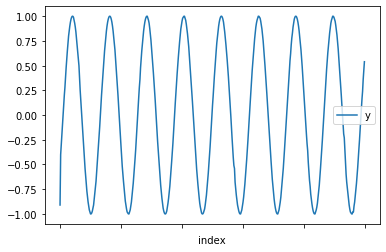

In [9]:
%matplotlib inline
df.plot()

## Our new best friend: convolution

Convolution is a DSP technique used in many fields, from 1-d signal analysis to more advanced image processing and video analysis in deep learning algorithms (CNN = Convolutional Neural Networks). It is very important to be familiar with it and how it works.

From [DSP Guide](https://www.dspguide.com/ch6/4.htm):
> Convolution is a formal mathematical operation, just as multiplication, addition, and integration. Addition takes two numbers and produces a third number, while convolution takes two signals and produces a third signal. Convolution is used in the mathematics of many fields, such as probability and statistics. In linear systems, convolution is used to describe the relationship between three signals of interest: the input signal, the impulse response, and the output signal.

![](https://www.dspguide.com/graphics/F_6_8.gif)


> Figure 6-8 illustrates (...) a flow diagram of how convolution occurs. Think of the input signal, x[n], and the output signal, y[n], as fixed on the page. The convolution machine, everything inside the dashed box, is free to move left and right as needed. The convolution machine is positioned so that its output is aligned with the output sample being calculated. Four samples from the input signal fall into the inputs of the convolution machine. These values are multiplied by the indicated samples in the impulse response, and the products are added. This produces the value for the output signal, which drops into its proper place. For example, y[n] is shown being calculated from the four input samples: x[3], x[4], x[5], and x[6].

> To calculate y[7], the convolution machine moves one sample to the right. This results in another four samples entering the machine, x[4] through x[7], and the value for y[7] dropping into the proper place. This process is repeated for all points in the output signal needing to be calculated.

How we shape the function h[n] is very important, and can be used for many different purposes:
- Filters
- Inverters and attenuators
- Calculate derivatives
- Feature extraction
...

> One problem with convolution occurs when the convolution machine is located fully to the left or right of the input signal. 
In this position, it is trying to receive input from samples: x[-3], x[-2], x[-1] and x[0]. The problem is, three of these samples: x[-3], x[-2] and x[-1] do not exist! 
This same dilemma arises in (d), where the convolution machine tries to accept samples to the right of the defined input signal, points x[9], x[10] and x[11].

> One way to handle this problem is by **inventing the nonexistent samples**. This involves adding samples to the ends of the input signal, with each of the added samples having a value of zero. This is called **padding** the signal with zeros. Instead of trying to access a nonexistent value, the convolution machine receives a sample that has a value of zero. Since this zero is eliminated during the multiplication, the result is mathematically the same as ignoring the nonexistent inputs.

### Building our own convolution filter

Let's then use our signal before and make some use of the convolution we have just learnt:

In [10]:
from src.formulas import smooth_convolution

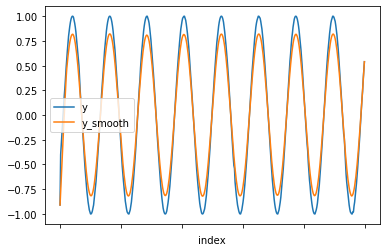

In [11]:
df['y_smooth'] = smooth_convolution(df['y'], 21)
df.plot()

Let's have a closer look:

Original signal length: 500
Smooth signal length: 500
Half window size: 11
Padded signal length: 522, original signal + the size of the window (window = 22)


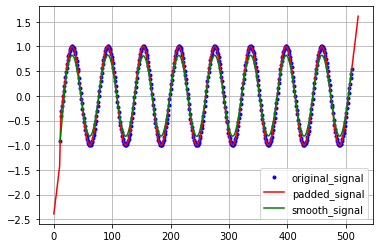

In [12]:
y = df['y'].values
print (f'Original signal length: {len(y)}')
print (f'Smooth signal length: {len(df["y_smooth"].values)}')

half_window = 11
print (f'Half window size: {half_window}')

firstvals = y[0] - np.abs(y[1:half_window+1][::-1] - y[0])
lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
nan_padding = []
y_original = np.concatenate((firstvals*np.nan, list(map(float, y)), lastvals*np.nan))
y_padding = np.concatenate((firstvals, list(map(float, y)), lastvals))
y_smooth = np.concatenate((firstvals*np.nan, df['y_smooth'].values, lastvals*np.nan))
print (f'Padded signal length: {len(y_padding)}, original signal + the size of the window (window = {2*half_window})')

plt.plot(y_original, 'b.', label='original_signal')
plt.plot(y_padding, 'r', label='padded_signal')
plt.plot(y_smooth, 'g', label='smooth_signal')
plt.legend()
plt.grid()

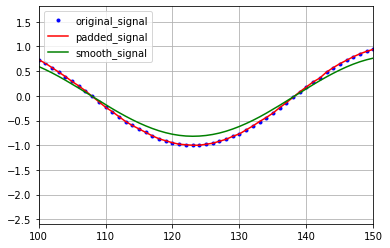

In [13]:
plt.plot(y_original, 'b.', label='original_signal')
plt.plot(y_padding, 'r', label='padded_signal')
plt.plot(y_smooth, 'g', label='smooth_signal')
plt.xlim([100, 150])
plt.legend()
plt.grid()

Let's now add some components to our signal (note that the original amplitude is 2 (from -1 to 1):

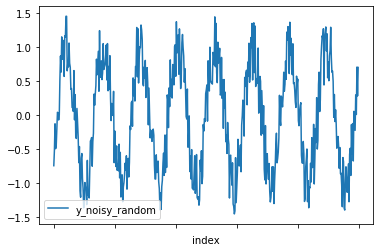

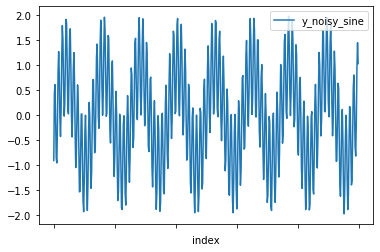

In [14]:
df['y_noisy_random'] = df['y'] + np.random.random(len(df['y'])) - 0.5
df['y_noisy_sine'] = df['y'] + np.sin(np.arange(len(df['y'])))
df.plot(y = 'y_noisy_random')
df.plot(y = 'y_noisy_sine')

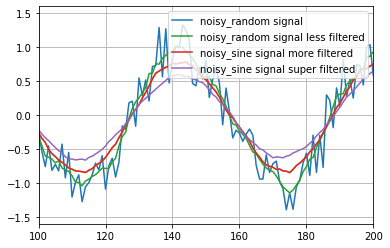

In [15]:
plt.plot(df['y_noisy_random'].values, label = 'noisy_random signal')
plt.plot(smooth_convolution(df['y_noisy_random'], 21))
plt.plot(smooth_convolution(df['y_noisy_random'], 7), label = 'noisy_random signal less filtered')
plt.plot(smooth_convolution(df['y_noisy_random'], 21), label = 'noisy_sine signal more filtered')
plt.plot(smooth_convolution(df['y_noisy_random'], 31), label = 'noisy_sine signal super filtered')
plt.xlim([100, 200])
plt.legend()
plt.grid()
plt.show()

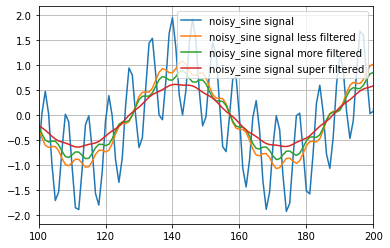

In [16]:
plt.plot(df['y_noisy_sine'].values, label = 'noisy_sine signal')
plt.plot(smooth_convolution(df['y_noisy_sine'], 7), label = 'noisy_sine signal less filtered')
plt.plot(smooth_convolution(df['y_noisy_sine'], 21), label = 'noisy_sine signal more filtered')
plt.plot(smooth_convolution(df['y_noisy_sine'], 31), label = 'noisy_sine signal super filtered')
plt.xlim([100, 200])
plt.legend()
plt.grid()
plt.show()

### Caveats

Important facts about smoothing using **any type of filter based on a moving window**:
- Not all the noise will be removed. The size of the window will determine how much you _clean_ the signal.
- If you clean the signal too much, you loose amplitude in it and you loose your original signal

Also, filters can make your **signal to have a phase**:

In [17]:
from src.formulas import exponential_smoothing

(100, 200)

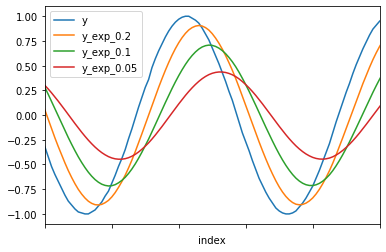

In [27]:
df['y_exp_0.2'] = exponential_smoothing(df['y'], 0.2)
df['y_exp_0.1'] = exponential_smoothing(df['y'], 0.1)
df['y_exp_0.05'] = exponential_smoothing(df['y'], 0.05)
df.plot(y=['y', 'y_exp_0.2', 'y_exp_0.1', 'y_exp_0.05'])
plt.xlim([100, 200])

(100, 200)

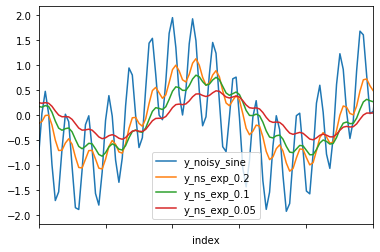

In [28]:
df['y_ns_exp_0.2'] = exponential_smoothing(df['y_noisy_sine'], 0.2)
df['y_ns_exp_0.1'] = exponential_smoothing(df['y_noisy_sine'], 0.1)
df['y_ns_exp_0.05'] = exponential_smoothing(df['y_noisy_sine'], 0.05)
df.plot(y=['y_noisy_sine', 'y_ns_exp_0.2', 'y_ns_exp_0.1', 'y_ns_exp_0.05'])
plt.xlim([100, 200])

To cope with this problem, filters are many times applied forwards and backwards

### Using libraries

Scipy signal package can be used for many of this signal processing tasks.
https://docs.scipy.org/doc/scipy/reference/signal.html

**scipy.filtfilt**

Apply a digital filter **forward and backward** to a signal. This function applies a linear **digital filter twice**, once forward and once backwards. The combined filter has zero phase and a filter order twice that of the original. The function provides options for handling the edges of the signal.

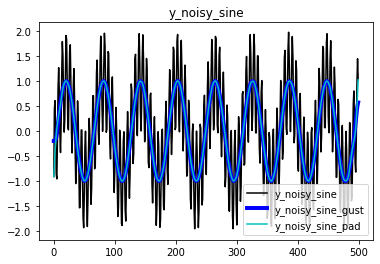

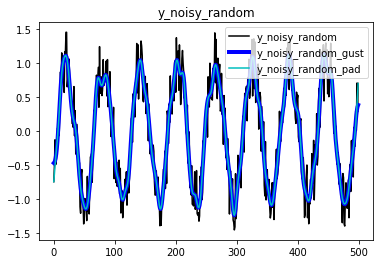

In [29]:
from scipy import signal
b, a = signal.butter(8, 0.125)
b, a = signal.ellip(4, 0.01, 120, 0.125)  # Filter to be applied.

for y_signal in ['y_noisy_sine', 'y_noisy_random']:
    sig = df[y_signal].values 
    fgust = signal.filtfilt(b, a, sig, method="gust")
    fpad = signal.filtfilt(b, a, sig, padlen=50)
    plt.plot(sig, 'k-', label=y_signal)
    plt.plot(fgust, 'b-', linewidth=4, label=y_signal + '_gust')
    plt.plot(fpad, 'c-', linewidth=1.5, label=y_signal + '_pad')
    plt.legend(loc='best')
    plt.title(y_signal)
    plt.show()

### Peak Detection

[ 21  82 143 204 265 326 387 449 497]


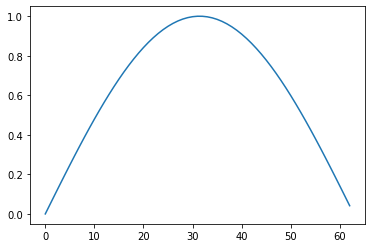

In [325]:
from scipy import signal
xs = df.index
peakind = signal.find_peaks_cwt(df['y'], np.arange(1,10))
print (peakind)
peakind, xs[peakind]
plt.plot(data)

### Derivative

In [317]:
import math
def conv_derivative(y, box_pts):
    '''
        Calculate derivative of input signal using a convolutional filter
        box_pts has to be even number
    '''
    
    half_window = (box_pts-1) // 2

    box = np.zeros(box_pts)
    box[half_window+1:] = np.arange(half_window)+1
    for index_box in range(half_window): box[index_box] = - box[-(index_box+1)]
    
    box = - box/((math.sqrt(half_window-1))*(half_window-1))
    # Using svagol filter coefficients we need to compensate for window size. 
    # This is just an approximation and won't work with window > 10
    
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, list(map(float, y)), lastvals))
    y_derivative = np.convolve(y, box, mode='valid')
    return y_derivative

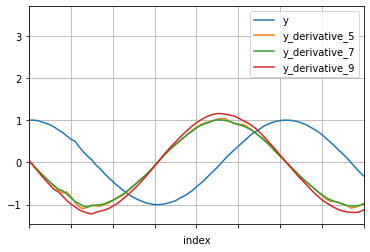

In [318]:
list_plot = ['y']
for derivative_number in [5, 7, 9]:
    df[f'y_derivative_{derivative_number}'] = conv_derivative(df['y'], derivative_number)
    list_plot.append(f'y_derivative_{derivative_number}')
df.plot(y = list_plot)
plt.xlim([20, 100])

plt.grid()